In [1]:
import numpy as np
from classfunctions import NbodyClass
import matplotlib.pyplot as mpl
from mpl_toolkits.mplot3d import Axes3D

In /home/elizabeth/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/elizabeth/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/elizabeth/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/elizabeth/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/elizabeth/.local/lib/python3.6/site-packages/matplo

### Part 3: Large n

This script scatters many particles randomly through a domain and watches as time passes. Both the periodic and nonperiodic case are considered.

ffmpeg -i nbodystep%02d.jpg test1.gif

#### Periodic case

In the periodic case we should see the mass clump slightly into smaller regions, but not be drawn completely together, since it's recieving equal draw from all directions.

The only catch: my energy simply increases.
Output files here for this case:
Gif displayed below.
<!-- 
<!-- ![SegmentLocal](part3PeriodicOutputs/grid50step20soften4/grid50step20soften4periodic.gif "segment") -->
<!-- <img src="part3PeriodicOutputs/grid50step20soften4/grid50step20soften4periodic.gif" width="800" height="800"/> -->
 -->
Potential problems: 
Grid size too small. Collapses into a single blob (can see it running over the edges due to periodicity). And at times you can really see the grid bin edges, shown in an image below the gif.

Gif of grid too small:
<!-- <img src="part3PeriodicOutputs/grid10step20soften4/grid10step20soften4periodic.gif" width="800" height="800"/> -->

Gif of bin edges:

The bin edges were less evident when the softening was reduced to 2. See gif below. This makes sense because the potential is less boxy for each particle and more natural.


#### Non - periodic case.

In the non-periodic case we should see all of the particles eventually clumping in the inside of the area, as they will be drawn together by gravity. Note that some of the particles might gain a large velocity and be lost out of the frame.

Collapses in on itself and EXPLOOOOODES!!
Looks odd when started with a square:
part3NonperiodicOutputs/grid30step20soften3


Output images and gif located here:


In [2]:
num_part = 10**5
spread=50
periodic = True
vzero = True
soft=4
n = 200


name_prefix = "grid" + str(spread) + "step" + str(n) + "soften" + str(soft)
if periodic:
    outdir = "part3PeriodicOutputs/" + name_prefix + "/" + name_prefix
else:
    outdir = "part3NonperiodicOutputs/" + name_prefix + "/" + name_prefix


pos = spread*np.random.rand(3, num_part)
# pos = (spread/2)*np.random.randn(3, num_part) + spread/2 #gaussian distribution
if vzero:
    v = np.zeros( (3, num_part) )
else:
    v = np.random.rand(3, num_part)
    
#instantiate the class
nbody = NbodyClass(pos, v, outdir=outdir, sgrid=spread, periodic=periodic, gradient=False, soft=soft)
nbody.calculate_potential(DEBUG=False)

nbody.take_n_steps(n, plots=True, plot_every=1)

200

In [3]:
print('Run specs: ')
print('Periodic: ', periodic)
print('Grid cells: ', spread)
print('Number of particles: ', num_part)
print('Number of steps: ', n)
print('Velocities start at zero :', vzero)
print('Softening: ', soft)

readme = outdir+ "readme.txt"
print('printing to readme file ...', readme)
f = open(readme, "w")
f.write('Run specs:')
f.write('\nPeriodic: ' + str(periodic))
f.write('\nGrid cells: ' + str(spread))
f.write('\nNumber of particles: ' + str(num_part))
f.write('\nNumber of steps: ' + str(n))
f.write('\nVelocities start at zero :' +  str(vzero))
f.write('\nSoftening: ' + str(soft))
f.close()

Run specs: 
Periodic:  True
Grid cells:  50
Number of particles:  100000
Number of steps:  200
Velocities start at zero : True
Softening:  4
printing to readme file ... part3PeriodicOutputs/grid50step200soften4/grid50step200soften4readme.txt


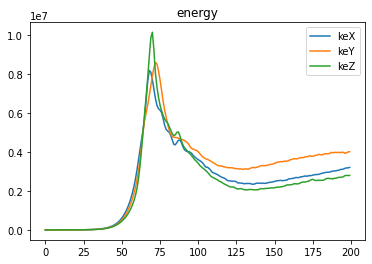

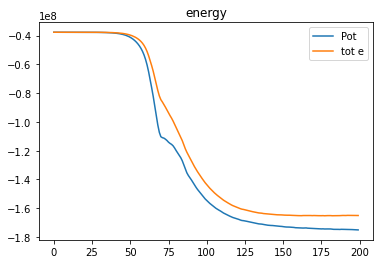

In [4]:
#plot the energy, see how well it's conserved
# nbody.plot_energy()
lims = 25

mpl.figure()
# mpl.plot(range(0, n), nbody.pe[:n])
mpl.plot(range(0, n), nbody.ke[0, :n])
mpl.plot(range(0, n), nbody.ke[1, :n])
mpl.plot(range(0, n), nbody.ke[2, :n])
# mpl.plot(range(0, n), nbody.pe[:n] + np.sum(nbody.ke, axis=0)[:n])
mpl.legend(['keX', 'keY', 'keZ'])
mpl.title('energy')
# mpl.xlim([0, lims])
mpl.show()

mpl.figure()
mpl.plot(range(0, n), nbody.pe[:n])
# mpl.plot(range(0, n), nbody.ke[0, :n])
# mpl.plot(range(0, n), nbody.ke[1, :n])
# mpl.plot(range(0, n), nbody.ke[2, :n])
mpl.plot(range(0, n), nbody.pe[:n] + np.sum(nbody.ke, axis=0)[:n])
mpl.legend(['Pot', 'tot e'])
# mpl.legend(['Pot', 'keX', 'keY', 'keZ', 'tot e'])
# mpl.xlim([0, lims])
mpl.title('energy')
mpl.show()

np.save(outdir + 'kinen', nbody.ke)
np.save(outdir + 'poten', nbody.pe)